In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans


In [5]:
# Charger les données dans un DataFrame
ds = pd.read_csv("/content/drive/MyDrive/ekinox/data/student_data.csv", delimiter=",")

In [ ]:
ds.shape

(357, 34)

In [5]:
ds.head()

,StudentID,FirstName,FamilyName,school,sex,age,address,famsize,Pstatus,Medu,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
0,0,Rafael,Morais,GP,F,18,U,GT3,A,4,...,no,no,4,3,4,1,1,3,6,6
1,1,Lara,Braga,GP,F,17,U,GT3,T,1,...,yes,no,5,3,3,1,1,3,4,6
2,2,Gonçalo,Azevedo,GP,F,15,U,LE3,T,1,...,yes,no,4,3,2,2,3,3,10,10
3,3,Lara,Perna,GP,F,15,U,GT3,T,4,...,yes,yes,3,2,2,1,1,5,2,15
4,4,João,Pires,GP,F,16,U,GT3,T,3,...,no,no,4,3,2,1,2,5,4,10


In [8]:
ds[['age', 'traveltime', 'studytime', 'failures','higher','Dalc', 'Walc', 'health', 'absences', 'FinalGrade']].head()

,age,traveltime,studytime,failures,higher,Dalc,Walc,health,absences,FinalGrade
0,18,2,2,0,yes,1,1,3,6,6
1,17,1,2,0,yes,1,1,3,4,6
2,15,1,2,3,yes,2,3,3,10,10
3,15,1,3,0,yes,1,1,5,2,15
4,16,1,2,0,yes,1,2,5,4,10


In [ ]:
ds.describe()

,StudentID,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,FinalGrade
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,193.176471,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527,11.523810
std,115.771252,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623,3.227797
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000
25%,89.000000,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,9.000000
50%,196.000000,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000
75%,292.000000,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,14.000000
max,394.000000,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,20.000000


la variable "absences" a une plage de valeurs très différente des autres variables, avec une valeur maximale de 75, alors que toutes les autres variables ont une plage de valeurs maximales de 5. Il peut être judicieux de normaliser cette variable pour faciliter la comparaison avec les autres variables.

In [ ]:
# Vérifier les données manquantes pour chaque colonne
ds.isnull().sum()

StudentID     0
FirstName     0
FamilyName    0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
FinalGrade    0
dtype: int64

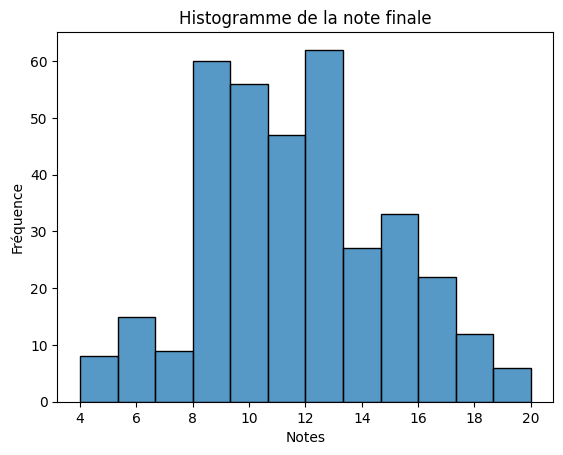

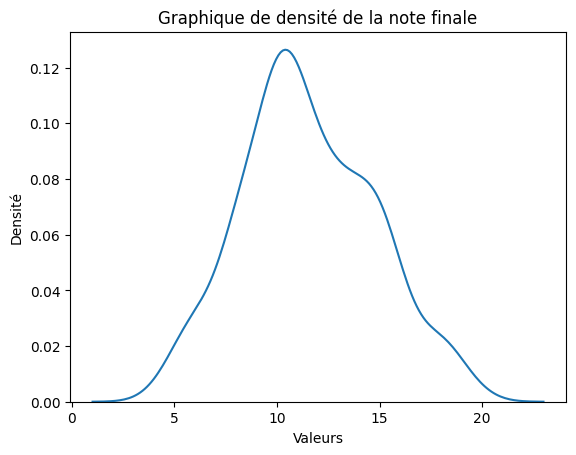

In [130]:
# Affichage de l'histogramme
sns.histplot(ds["FinalGrade"], kde=False)
plt.title("Histogramme de la note finale")
plt.xlabel("Notes")
plt.ylabel("Fréquence")
plt.show()
plt.savefig("/content/drive/MyDrive/ekinox/notebooks/01_exploration/fig/histo_finalGrade.png")

# Affichage du graphique de densité
sns.kdeplot(ds["FinalGrade"])
plt.title("Graphique de densité de la note finale")
plt.xlabel("Valeurs")
plt.ylabel("Densité")
plt.show()

### Lien statistique entre variable catégorielle ou numérique avec la variable explicative : le FinalGrade

On veut déterminer s’il y a un lien statistique entre la note finale et certaines variables, autrement dit si cette note est indépendante des autres
variables.

On applique le test de khi-2 et l'information mutuelle, et on peut observer la hauteur de chaque barre qui correspond à la valeur du score de Khi2 ou d'information mutuelle pour chaque feature. Plus la barre est haute, plus la feature est importante pour expliquer la variable cible. Les features ayant les scores les plus élevés sont les plus importantes pour expliquer la variable cible.

Cela permet de sélectionner les features les plus importantes pour la modélisation et de se concentrer sur celles-ci dans l'analyse de données. 

In [22]:
# Séparer les features catégorielles et numériques
categorical_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 
                        'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
                        'Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
# on va considérer ['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health'] comme des variables numériques mm si elles correspondent
# réellement à des variables catégorielles

In [ ]:
# Définir la variable à expliquer
target = 'FinalGrade'

# One-hot encode the categorical features
encoder = OneHotEncoder()
X_cat = encoder.fit_transform(ds[categorical_features])

# Run the chi-squared test
chi2_scores, p_values = chi2(X_cat, ds[target])

<ipython-input-129-9d4638fd2478>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(categorical_features, rotation=45, ha='right')


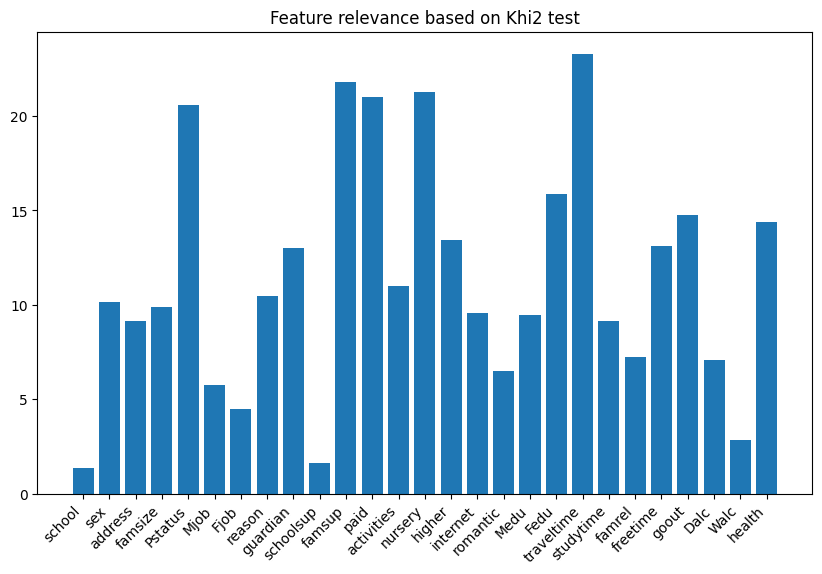

<Figure size 640x480 with 0 Axes>

In [129]:
# Créer les bar charts pour les features catégorielles
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(categorical_features, chi2_scores[:len(categorical_features)])
ax.set_xticklabels(categorical_features, rotation=45, ha='right')
ax.set_title('Feature relevance based on Khi2 test')
plt.show()
plt.savefig("/content/drive/MyDrive/ekinox/notebooks/01_exploration/fig/khi2.png")

In [25]:
# Création d'un DataFrame pour stocker les résultats du test
results_df = pd.DataFrame({'Feature': categorical_features, 'Chi2_score': chi2_scores[:len(categorical_features)], 'p_value': p_values[:len(categorical_features)]})

# Tri des variables par ordre décroissant selon les chi2_scores
results_df = results_df.sort_values(by='Chi2_score', ascending=False)

# Affichage des 10 variables les plus importantes selon les chi2_scores
print('Top 10 categorical features based on chi2_scores:')
print(results_df.head(10))

# Tri des variables par ordre croissant selon les p_values
results_df = results_df.sort_values(by='p_value')

# Affichage des 10 variables les plus importantes selon les p_values
print('Top 10 categorical features based on p_values:')
print(results_df.head(10))

Top 10 categorical features based on chi2_scores:
       Feature  Chi2_score   p_value
19  traveltime   23.302655  0.105880
10      famsup   21.821744  0.149041
13     nursery   21.288754  0.167676
11        paid   21.001192  0.178465
4      Pstatus   20.589159  0.194849
18        Fedu   15.888865  0.460744
23       goout   14.744744  0.543407
26      health   14.385253  0.570037
14      higher   13.435808  0.640666
22    freetime   13.099239  0.665488
Top 10 categorical features based on p_values:
       Feature  Chi2_score   p_value
19  traveltime   23.302655  0.105880
10      famsup   21.821744  0.149041
13     nursery   21.288754  0.167676
11        paid   21.001192  0.178465
4      Pstatus   20.589159  0.194849
18        Fedu   15.888865  0.460744
23       goout   14.744744  0.543407
26      health   14.385253  0.570037
14      higher   13.435808  0.640666
22    freetime   13.099239  0.665488


Le test du χ2 permet de vérifier l’absence de lien statistique (l’indépendance) entre deux variables X et Y. Ici, plus la barre est longue, plus la variable est fortement associée à la variable explicative.  Les variables les plus importantes ont les scores les plus élevés ou les p-values les plus faibles.
la p-value est supérieure au seuil de signification, on ne peut pas rejeter l'hypothèse nulle et on considère qu'il n'y a pas suffisamment de preuves pour conclure à l'existence d'un lien significatif entre les variables.

### Information mutuelle pour les variables numériques

In [28]:
ds[numerical_features].describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,16.655462,2.795518,2.546218,1.431373,2.042017,0.271709,3.955182,3.246499,3.098039,1.495798,2.330532,3.549020,6.316527
std,1.268262,1.093999,1.084217,0.686075,0.831895,0.671750,0.885721,1.011601,1.090779,0.919886,1.294974,1.402638,8.187623
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


In [ ]:
# Normaliser les données numériques
scaler = StandardScaler()
ds[numerical_features] = scaler.fit_transform(ds[numerical_features])

# Calculer l'information mutuelle pour les features numériques
mi_scores = mutual_info_classif(ds[numerical_features], ds[target])

<ipython-input-128-1f45097df07c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(numerical_features, rotation=45, ha='right')


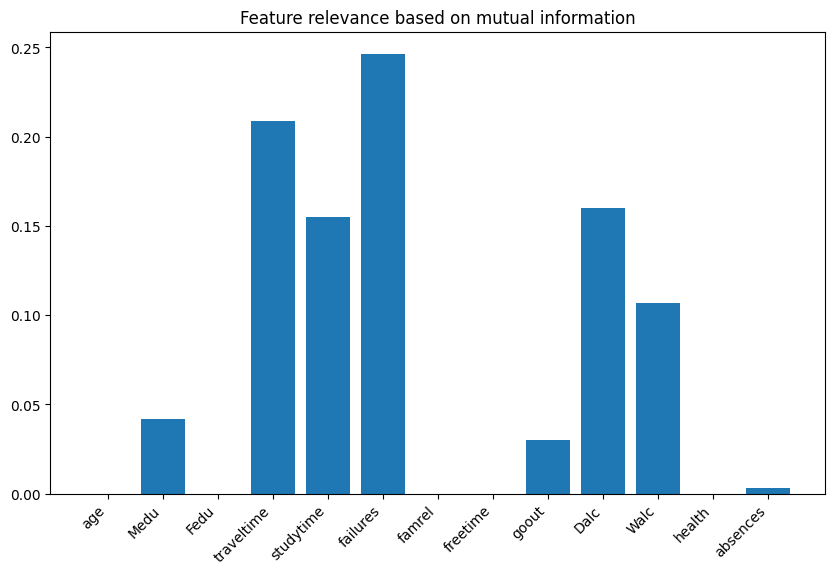

<Figure size 640x480 with 0 Axes>

In [128]:
# Créer les bar charts pour les features numériques
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(numerical_features, mi_scores)
ax.set_xticklabels(numerical_features, rotation=45, ha='right')
ax.set_title('Feature relevance based on mutual information')
plt.show()
plt.savefig("/content/drive/MyDrive/ekinox/notebooks/01_exploration/fig/mutual_info.png")


L’information mutuelle d’un couple (X, Y ) de variables reflète leur degré de dépendance au sens probabiliste. L’information mutuelle est nulle si et seulement si les variables sont indépendantes, et croit lorsque
la dépendance augmente. 

Sans normaliser: les variables suivantes semblent etre les plus importantes: traveltime, Dalc, absences, failures et studytime 

Avec le standard scaler: absences ne l'est plus trop ! 

Dans le cas particulier où l’on a une relation linéaire entre deux variables, cette dépendance est exprimée par le coefficient de corrélation entre ces deux variables.

#### Exploration des variables Catégorielles ou catégorielles ordinales / Corrélation de Spearmanr

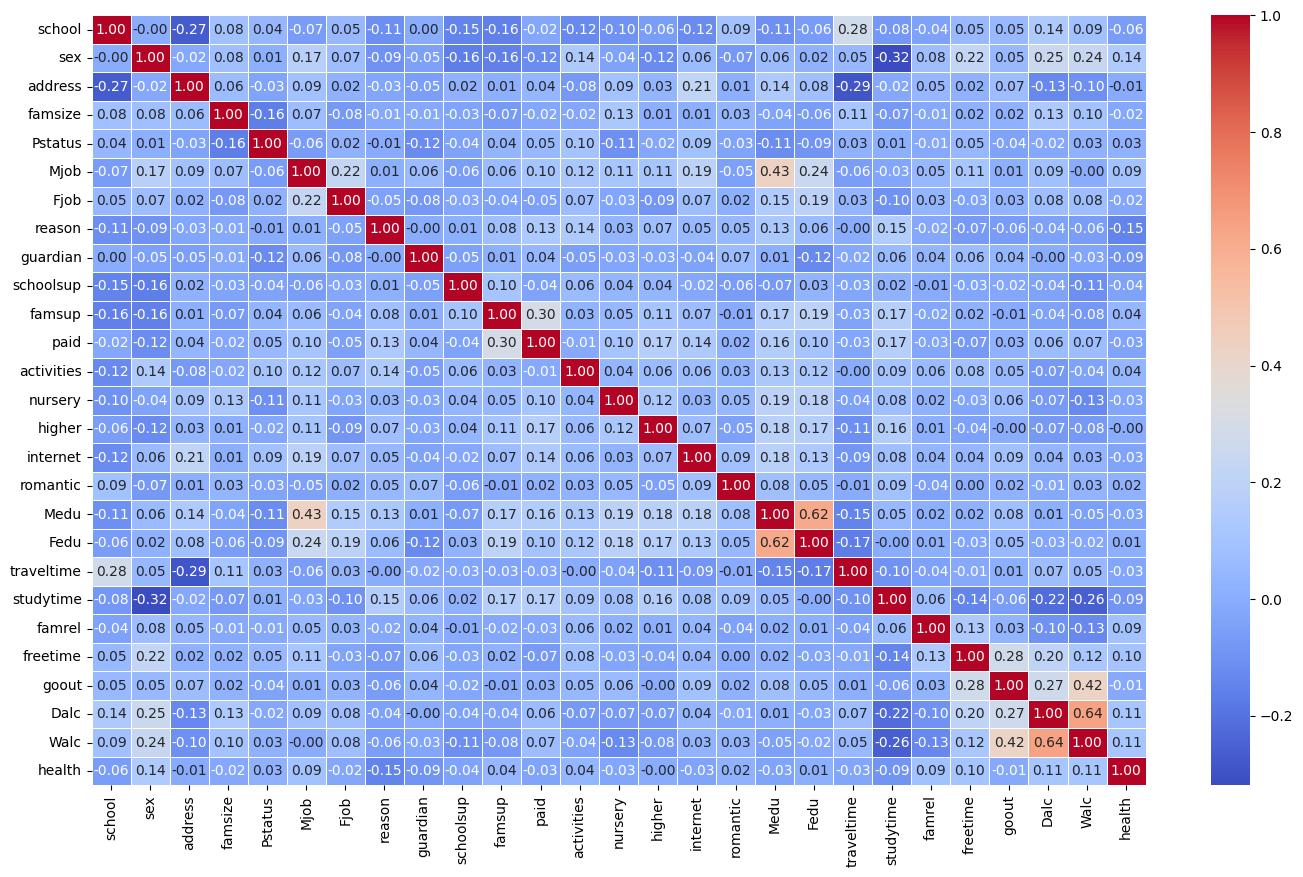

<Figure size 640x480 with 0 Axes>

In [127]:
from scipy.stats import spearmanr

# Le coefficient de corrélation de Spearman varie entre -1 et 1. Une valeur de -1 indique une corrélation négative parfaite, 
# 0 indique aucune corrélation, et 1 indique une corrélation positive parfaite. Les valeurs-p indiquent si la corrélation est significative ou non. 
# Une valeur-p inférieure à 0,05 est généralement considérée comme significative.

# En interprétant la matrice de corrélation, on peut identifier les variables qui sont corrélées fortement ou pas entre elles. 
# Les variables qui ont des coefficients de corrélation élevés (proches de 1 ou -1) et une valeur-p significative sont fortement corrélées, tandis que celles 
# avec des coefficients de corrélation proches de 0 et une valeur-p non significative sont peu corrélées. Les variables qui ont des coefficients de corrélation 
# négatifs indiquent une corrélation inverse.

# Calculer la corrélation de Spearman pour toutes les paires de variables catégorielles
corr_matrix_sp = pd.DataFrame(index=categorical_features, columns=categorical_features)

for var1 in categorical_features:
    for var2 in categorical_features:
        corr, pval = spearmanr(ds[var1], ds[var2])
        corr_matrix_sp.loc[var1, var2] = corr

# Créer une heatmap avec les valeurs annotées
fig, ax = plt.subplots(figsize=(17,10))
sns.heatmap(corr_matrix_sp.astype(float), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)

# Afficher la heatmap
plt.show()
plt.savefig("/content/drive/MyDrive/ekinox/notebooks/01_exploration/fig/corr_heatmap_cat_spearman.png")

#### Corrélation des valeurs numériques

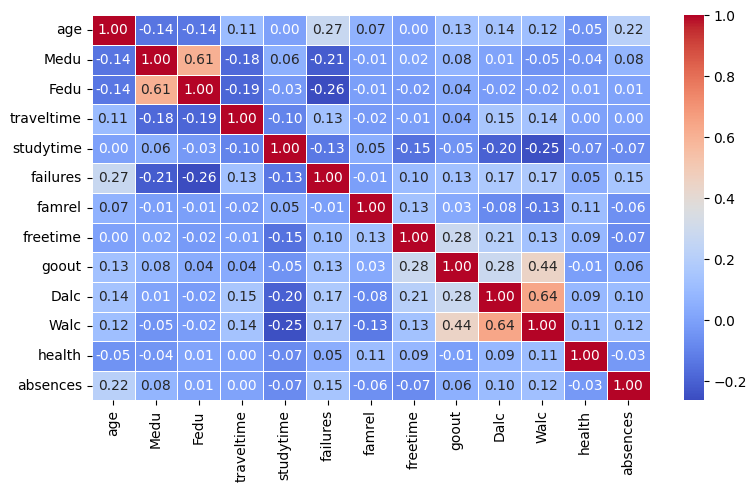

<Figure size 640x480 with 0 Axes>

In [125]:
# Créer une matrice de corrélation
ds_corr = ds[numerical_features]
corr_matrix = ds_corr.corr()

# Créer une heatmap avec les valeurs annotées
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)

# Afficher la heatmap
plt.show()
plt.savefig("/content/drive/MyDrive/ekinox/notebooks/01_exploration/fig/corr_heatmap_num.png")

In [ ]:
# Afficher les graphiques de dispersion pour les paires de variables avec une corrélation > 0.5 ou < -0.5
high_corr = corr_matrix[(corr_matrix > 0.5) | (corr_matrix < -0.5)]
plt.figure(figsize=(10, 10))
sns.pairplot(ds[high_corr.notnull().sum().sort_values(ascending=False).index], diag_kind="kde")
plt.show()

<Figure size 1000x1000 with 0 Axes>

#### Conversion des variables catégorielles en numériques

In [37]:
# créer une instance de LabelEncoder
le = LabelEncoder()

# appliquer le LabelEncoder à toutes les colonnes catégorielles
ds_corr_tr = ds[categorical_features].apply(lambda col: le.fit_transform(col))

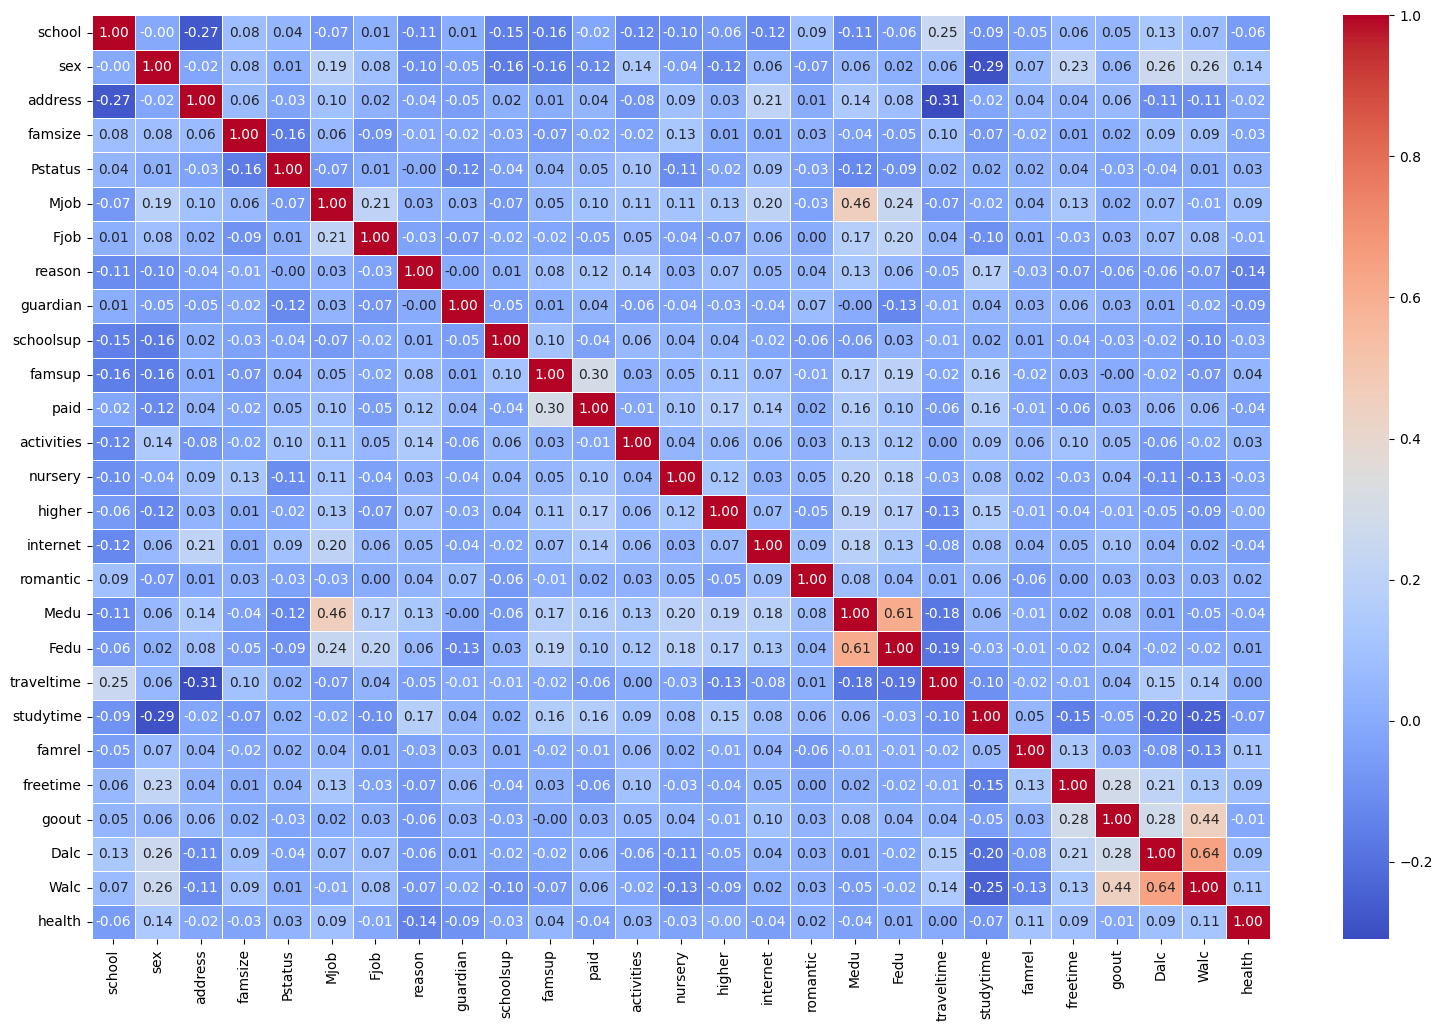

<Figure size 640x480 with 0 Axes>

In [124]:
# Créer une matrice de corrélation
corr_matrix_tr = ds_corr_tr.corr()

# Créer une heatmap avec les valeurs annotées
fig, ax = plt.subplots(figsize=(19,12))
sns.heatmap(corr_matrix_tr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, ax=ax)

# Afficher la heatmap
plt.show()
plt.savefig("/content/drive/MyDrive/ekinox/notebooks/01_exploration/fig/corr_heatmap_cat.png")

In [39]:
# Sélectionner les variables corrélées à un seuil de 0.2 en valeur absolue
corr_threshold = 0.25
corr_vars = []

for i, col in enumerate(corr_matrix_tr.columns):
    for j in range(i+1, len(corr_matrix_tr)):
        if abs(corr_matrix_tr.iloc[i,j]) >= corr_threshold:
            corr_vars.append((col, corr_matrix_tr.index[j]))

# Afficher les variables corrélées
print("Variables corrélées :")
for c in corr_vars:
    print(c[0], "et", c[1])

Variables corrélées :
school et address
school et traveltime
sex et studytime
sex et Dalc
sex et Walc
address et traveltime
Mjob et Medu
famsup et paid
Medu et Fedu
freetime et goout
goout et Dalc
goout et Walc
Dalc et Walc


In [ ]:
ds_corr_pca = ds[numerical_features]
ds_corr_pca

In [42]:
# Centrage et mise à l'échelle des données
num_data_scaled = (ds_corr_pca - ds_corr_pca.mean()) / ds_corr_pca.std()

# Création d'une instance de PCA avec 2 composantes principales
pca = PCA(n_components=2)

# Application de l'analyse en composantes principales aux données
pca.fit(num_data_scaled)

# variance sur les deux premières composantes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Affichage des charges des variables
loadings_df = pd.DataFrame(loadings, index=numerical_features, columns=['PC1', 'PC2'])
print(loadings_df)

# Affichage des corrélations des variables avec les composantes principales
corr_df = pd.DataFrame(pca.transform(num_data_scaled), columns=['PC1', 'PC2'])
corr_df = pd.concat([corr_df, ds['FinalGrade']], axis=1)
corr_matrix = corr_df.corr()
print(corr_matrix['FinalGrade'])

                 PC1       PC2
age         0.389584 -0.242509
Medu       -0.276559  0.770920
Fedu       -0.291402  0.776185
traveltime  0.338449 -0.282227
studytime  -0.383893 -0.129818
failures    0.513818 -0.324841
famrel     -0.063322 -0.054536
freetime    0.350617  0.219890
goout       0.533818  0.361815
Dalc        0.721101  0.296735
Walc        0.766397  0.308635
health      0.141943  0.057820
absences    0.238079  0.058981
PC1          -0.328962
PC2           0.121584
FinalGrade    1.000000
Name: FinalGrade, dtype: float64


- La PC1 est fortement influencée par les variables Dalc et Walc, qui sont les deux variables les plus corrélées avec cette composante. 
Cela suggère que la PC1 pourrait être interprétée comme une mesure de la consommation d'alcool des étudiants.
- La PC2 est fortement influencée par les variables goout et failures
Cela suggère que la PC2 pourrait être interprétée comme une mesure de l'implication sociale et de la réussite scolaire des étudiants.
- La variable FinalGrade est fortement corrélée avec les deux composantes, ce qui suggère que ces deux dimensions sont importantes pour expliquer la variance de la note finale des étudiants.
- Medu et Fedu sont fortement corrélées entre elles --> pourraient être combinées en une seule variable représentant le niveau d'éducation des parents.
- Les variables studytime et freetime ont des contributions opposées à la PC1, ce qui suggère que ces deux variables sont négativement corrélées avec la consommation d'alcool des étudiants. 
- De même, la variable absences a une contribution opposée à la PC2, ce qui suggère qu'elle est négativement corrélée avec l'implication sociale et la réussite scolaire des étudiants.

En combinant avec les résultats précédents, qui étaient cohérents par le fait que traveltime, Dalc, absences, failures et studytime semblaient être les variables les plus impactantes, on peut partir du principe que la complexité d'accompagner un élève serait aussi dépendante des variables mentionnées.

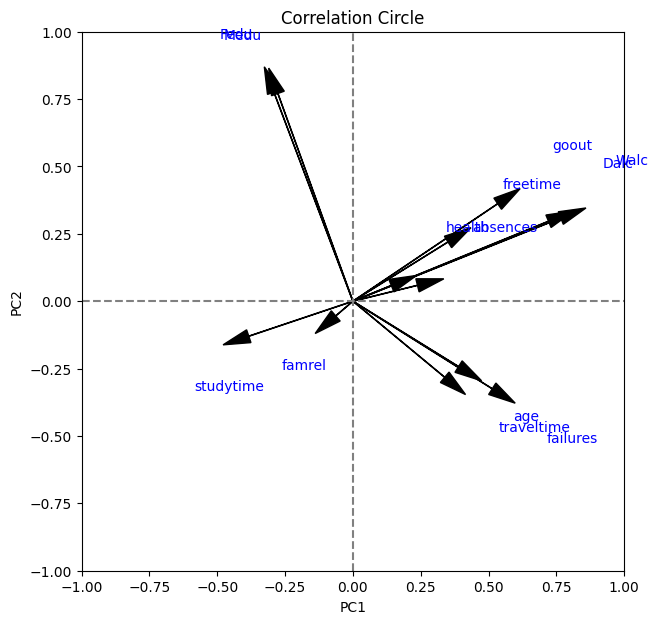

<Figure size 640x480 with 0 Axes>

In [123]:
# Plot the correlation circle
fig, ax = plt.subplots(figsize=(7,7))
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.axhline(0, color='grey', ls='--')
ax.axvline(0, color='grey', ls='--')

# Define the offset distance for the feature labels
offset = 0.2

for i, feature in enumerate(loadings_df.index):
    # Calculate the position of the feature label
    x_pos = loadings_df.iloc[i,0] + offset if loadings_df.iloc[i,0] >= 0 else loadings_df.iloc[i,0] - offset
    y_pos = loadings_df.iloc[i,1] + offset if loadings_df.iloc[i,1] >= 0 else loadings_df.iloc[i,1] - offset
    
    # Annotate the feature label with the updated position and color
    ax.annotate(feature, (x_pos, y_pos), color='blue')
    
    # Draw the arrow with the same style as before
    ax.arrow(0, 0, loadings_df.iloc[i,0], loadings_df.iloc[i,1], head_width=0.05, head_length=0.1, fc='k', ec='k')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Correlation Circle')
plt.show()
plt.savefig("/content/drive/MyDrive/ekinox/notebooks/01_exploration/fig/correlation_circle.png")

In [53]:
corr_df

,PC1,PC2,FinalGrade
0,-0.690941,0.944254,6
1,-0.597921,-2.062047,6
2,1.583702,-2.428674,10
3,-2.297205,-0.067306,15
4,-1.222068,0.216991,10
...,...,...,...
352,4.615820,-0.096493,9
353,2.735635,0.548355,16
354,4.144399,-2.439178,7
355,1.868951,-0.364282,10


### Clusters

La méthode elbow consiste à tracer la somme des carrés des distances intra-cluster (WCSS) en fonction du nombre de clusters. Nous cherchons à déterminer le nombre de clusters qui entraîne une baisse significative de WCSS. Dans l'exemple de code ci-dessus, nous tracions la courbe pour le nombre de clusters allant de 1 à 10. En fonction de la courbe, nous pouvons voir que le coude se trouve autour de 3 clusters, donc nous pouvons utiliser 3 comme nombre optimal de clusters.

Une fois que nous avons déterminé le nombre optimal de clusters, nous pouvons utiliser la méthode KMeans pour regrouper les élèves en clusters en utilisant le code suivant :

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

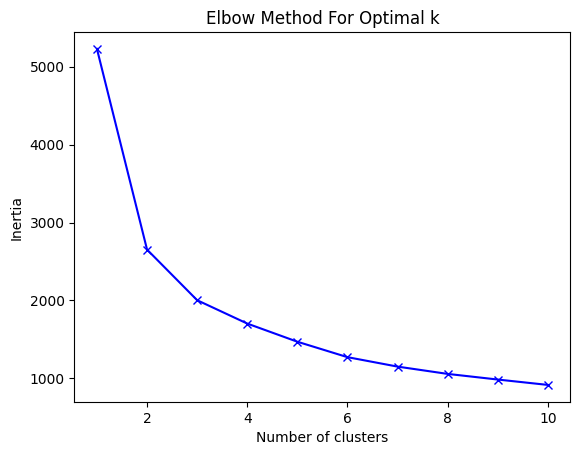

In [61]:
# Create empty list of inertia values
inertias = []

# Set range of k values to test
k_range = range(1, 11)

# For each value of k, perform k-means clustering and record the inertia
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(corr_df)
    inertia = kmeans.inertia_
    inertias.append(inertia)

# Plot the elbow curve
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [98]:
# Set the optimal number of clusters based on the elbow method
k = 3

# Perform KMeans clustering with the optimal k value
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(corr_df[['PC1', 'PC2']])

# Assign each data point to a cluster
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add the cluster labels to the original data
corr_df['Cluster'] = labels

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


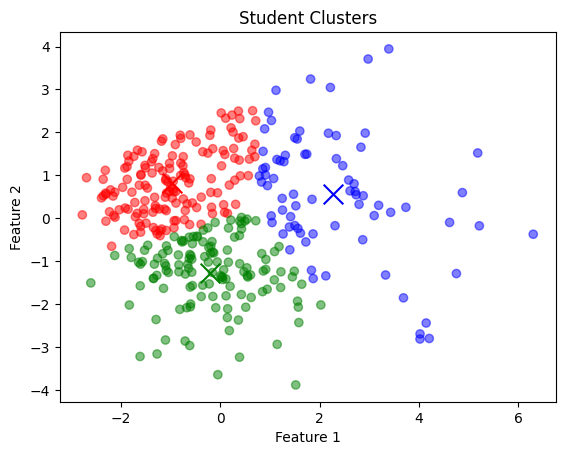

<Figure size 640x480 with 0 Axes>

In [108]:
def plot_clusters(data, centers, labels):
    # assign a color to each cluster label
    label_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    colors = [label_colors[label % len(label_colors)] for label in labels]

    # plot the data points
    plt.scatter(corr_df['PC1'], corr_df['PC2'], c=colors, alpha=0.5)

    # plot the cluster centers
    for i, center in enumerate(centers):
        plt.scatter(center[0], center[1], marker='x', color=label_colors[i % len(label_colors)], s=200)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Student Clusters')
    plt.show()
    plt.savefig("/content/drive/MyDrive/ekinox/notebooks/01_exploration/fig/student_clusters.png")

plot_clusters(corr_df, kmeans.cluster_centers_, kmeans.labels_)

In [102]:
# save the dataframe to a csv file
corr_df.to_csv('/content/drive/MyDrive/ekinox/notebooks/01_exploration/composantes_principales.csv', index=False)